<a href="https://colab.research.google.com/github/rdbrow10/Final-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project - Covid-19 Prediction Trials

## Introduction

### My Project

I will be taking a look at the number of covid cases and fatalities in the US at the start of the covid pandemic. Reviewing the amount of cases on and after January 21, 2020. I am doing this because covid entered the US around January 21, 2020 and began to spread. Also, reviewing the number of fatalities on and after March 2, 2020. Since, fatalitlies can occur weeks and months after the first day of infection. I wanted a larger pool of data. I will then predict the number of cases and fatalities 10 days after the last day I am reviewing for each category. Initially, I was going to take a look at predicting the number of cases and fatalities in the upcoming days, but I wanted to do a trial where I can compare the predictions made to the reported number of cases and fatalities on those specific days. 

### My Prediction

When trying to predict the number of covid cases and covid-related deaths, it can be difficult to predict these numbers soley due to external factors that cannot be precisely valued. Thus, I believe that these predictions will be undervalued as many people during the first few months of covid didn't think they would get it and/or didn't think it was that bad. 

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

# New Section

## Covid Cases in the US

In [78]:
path='https://raw.githubusercontent.com/rdbrow10/Final-Project/main/Cases.csv'
ds = pd.read_csv(path, index_col=0)
ds.head(95)

,Day_Number,Patients,Day_Trial,Day_Number_Trial,Number_of_Patients_Trial
Date,,,,,
2020-01-21,1,1,2020-02-05,16.0,11.0
2020-01-22,2,1,2020-02-16,27.0,13.0
2020-01-23,3,1,2020-02-22,33.0,15.0
2020-01-24,4,2,2020-02-27,38.0,58.0
2020-01-25,5,2,2020-03-03,43.0,118.0
...,...,...,...,...,...
2020-04-20,90,682985,NaN,NaN,NaN
2020-04-21,91,695873,NaN,NaN,NaN
2020-04-22,92,722598,NaN,NaN,NaN


In [74]:
x = ds['Day_Number']
y = ds['Patients']
x_test_patient = ds['Day_Number_Trial'][:13]
y_test_patient = ds['Number_of_Patients_Trial'][:13]
x_prediction =[[96],[97],[98],[99],[100],[101],[102],[103],[104],[105],[106]]

### Using a Linear Regression Model: Covid Cases

We can use a linear regression model to see the cases per day if there are no external factors (traveling, safety, temperatures, or etc.) This will be represented as a straight line to see the average infection increase per day. 

In [58]:
linear_regression=LinearRegression()

yy=np.log10(y)

scores = []

Linear_Regression = LinearRegression()

cv = KFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(x):
    X_train, X_test, y_train, y_test , yy_train, yy_test= x[train_index], x[test_index], y[train_index], y[test_index], yy[train_index], yy[test_index]
    Linear_Regression.fit(X_train.values.reshape(-1,1), yy_train)
    scores.append(Linear_Regression.score(X_test.values.reshape(-1,1), yy_test))
    
print("Average Linear Regression:",sum(scores)/len(scores))  

Average Linear Regression: 0.94699395122413


Above we get the average linear regression value. 

In [59]:
Linear_Regression.fit(x.values.reshape(-1,1), yy)
y_test_patient_log=np.log10(y_test_patient)
evaluation_1 =Linear_Regression.predict(x_test_patient.values.reshape(-1,1))
score=Linear_Regression.score(x_test_patient.values.reshape(-1,1), y_test_patient_log)   
print("Final Linear Regression:",score)

Final Linear Regression: 0.9344070716086723


Above we find that the final linear regression value is 0.9344

### 11 Day Prediction: Covid Cases

In [77]:
print('Predictions for the Next 11 Days:')
for predict in x_prediction:
  print('day',predict,'=',int(10**Linear_Regression.predict([predict])))

Predictions for the Next 11 Days:
day [96] = 136782005
day [97] = 162202041
day [98] = 192346223
day [99] = 228092503
day [100] = 270481994
day [101] = 320749293
day [102] = 380358439
day [103] = 451045552
day [104] = 534869400
day [105] = 634271358
day [106] = 752146517


Here we have predicted the number of cases in the next 11 days after April 25, 2020. We used the linear regression model to predict these values as it tells us the constant increase in covid cases over the ~3 month data set.

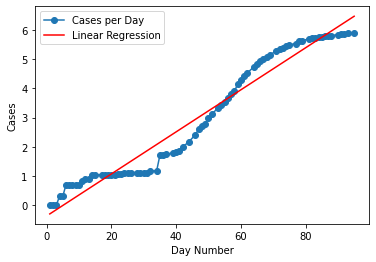

In [39]:
predicted1 = Linear_Regression.predict(x.values.reshape(-1,1))
predicted11 = 10**Linear_Regression.predict(x.values.reshape(-1,1))
plt.plot(x, yy, 'o-',label='Cases per Day')
plt.plot(x, predicted1,c='#ff0000',label='Linear Regression')
plt.legend()
plt.xlabel('Day Number')
plt.ylabel('Cases')
plt.show()

Here we have a graph displaying the actual number of cases per day (blue dotted line) and the linear regression (red dotted line). Again the linear regression line represensts the average cases per day over a given set of days. I converted this to a logarithmic graph to avoid having high number values, so it is easier to follow. 

## Covid-Related Fatalities in the US

In [40]:
path2='https://raw.githubusercontent.com/rdbrow10/Final-Project/main/Fatalities.csv'
ds_fatalities = pd.read_csv(path2, index_col=0)
ds_fatalities.head(60)

,Day_Number,Fatalities,Day_Trial,Day_Number_Trial,Fatalities_Trial
Date,,,,,
2020-03-02,1,6,2020-03-18,17.0,171.0
2020-03-03,2,9,2020-03-24,23.0,957.0
2020-03-04,3,11,2020-03-28,27.0,2754.0
2020-03-05,4,12,2020-04-01,31.0,6394.0
2020-03-06,5,14,2020-04-05,35.0,11793.0
2020-03-07,6,17,2020-04-11,41.0,23843.0
2020-03-08,7,21,2020-04-16,46.0,34619.0
2020-03-09,8,22,2020-04-22,52.0,47894.0
2020-03-10,9,30,2020-04-28,58.0,59266.0


In [72]:
x_fatalities = ds_fatalities['Day_Number']
y_death = ds_fatalities['Fatalities']
x_test_deaths = ds_fatalities['Day_Number_Trial'][:9]
y_test_deaths = ds_fatalities['Fatalities_Trial'][:9]
x_prediction2 =[[61],[62],[63],[64],[65],[66],[67],[68],[69],[70]]

### Using a Linear Regression Model: Covid-Related Fatalities

In [66]:
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()

y_log_D = np.log10(y_death)

scores = []

Linear_Regression = LinearRegression()

cv = KFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(x_fatalities):
    X_train_D, X_test_D, y_log_train_D, y_log_test_D= x_fatalities[train_index], x_fatalities[test_index], y_log_D[train_index], y_log_D[test_index]
    
    Linear_Regression.fit(X_train_D.values.reshape(-1,1), y_log_train_D)
    scores.append(Linear_Regression.score(X_test_D.values.reshape(-1,1), y_log_test_D))
    
print("Average Linear Regression:",sum(scores)/10)

Average Linear Regression: 0.7764526194667118


Above is the average linear regression value.

In [67]:
Linear_Regression.fit(x_fatalities.values.reshape(-1,1), y_log_D)
y_test_deaths_log=np.log10(y_test_deaths)
evaluation_4 =Linear_Regression.predict(x_test_deaths.values.reshape(-1,1))
score=Linear_Regression.score(x_test_deaths.values.reshape(-1,1), y_test_deaths_log)   
print("Final Linear Regression:",score)

Final Linear Regression: 0.8092388877578485


Here we have the final linear regression value. 

### 10 Day Prediction: Covid-Related Fatalities

In [73]:
print('Preddictions for the Next 10 Days:')
for predict in x_prediction2:
  print('day',predict,'=',int(10**Linear_Regression.predict([predict])))

Preddictions for the Next 10 Days:
day [61] = 350809
day [62] = 416005
day [63] = 493317
day [64] = 584997
day [65] = 693715
day [66] = 822637
day [67] = 975519
day [68] = 1156813
day [69] = 1371799
day [70] = 1626739


Here we have predicted the number of covid-related fatalities over the next 10 days after April 30, 2020. Same as in predicting the covid cases, we use the linear regression model to predict these values. 

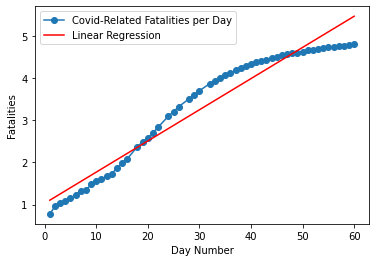

In [52]:
predicted4 =(Linear_Regression.predict(x_fatalities.values.reshape(-1,1)))
plt.plot(x_fatalities, y_log_D, 'o-',label='Covid-Related Fatalities per Day')
plt.plot(x_fatalities, predicted4,c='#ff0000',label='Linear Regression')
plt.legend()
plt.xlabel('Day Number')
plt.ylabel('Fatalities')
plt.show()

Here we have a graph displaying the actual number of covid-related fatalities per day (blue dotted line) and the linear regression (red dotted line). Again, I converted this to a logarithmic graph to avoid having high number values, so it is easier to follow.

## Explanation

### Linear Regression

Linear regression is used here because it is the easiest way of finding an estimate over a period of time in these variables above. The equation for linear regression in our situation is y = bx + a. In this equation 'b' represents the slope of the line, computed by find the (sum of all y-coordinates)/(the sum of all the x-coordinates). As most people know, the a represents the y-intercept. 

## CDC Reported Covid Cases and Covid-Related Fatalities

Here I will be reviewing the CDC Covid-19 records, looking at the number of cases per week. I would have liked to get the cases per day to be able to really compare, but I could not find data on that except for certain websites that may not be credible. 

### Covid Cases:

In [54]:
path3='https://raw.githubusercontent.com/rdbrow10/Final-Project/main/CDCReportedCovidCases'
ds_CDCCovidCases = pd.read_csv(path3, index_col=0)
ds_CDCCovidCases.head(15)

,Weekly_Cases
Date,
Jan 29 2020,5
Feb 5 2020,10
Feb 12 2020,10
Feb 19 2020,15
Feb 26 2020,24
Mar 4 2020,112
Mar 11 2020,1169
Mar 18 2020,8108
Mar 25 2020,60202


The above is a table of weekly cases in the US. We can now compare the predicted amount of cases to the reported number of cases per week. To do this we need to categorize the predicted numbers into a week. So, by adding up the cases per day starting on April 30, 2020 or day 100-106, we get a total of 
80,680,443 cases during the week of April 30, 2020 - May 6, 2020. This is quite suprising how high this value is. I originally thought a linear regression line would undervalue this due to behaviors, but I forgot to consider there is a limit to population size so there could only be a certain amount of cases each week. Here we can see how linear regression can work well in some aspects but not so well in others. 

### Covid-Related Fatalities:

In [65]:
path4='https://raw.githubusercontent.com/rdbrow10/Final-Project/main/CDCReportedCovidFatalities'
ds_CDCCovidFatalities = pd.read_csv(path4, index_col=0)
ds_CDCCovidFatalities.head(10)

,Weekly_Fatalities
Date,
Mar 4 2020,6
Mar 11 2020,9
Mar 18 2020,135
Mar 25 2020,1156
Apr 1 2020,5455
Apr 8 2020,12656
Apr 15 2020,15527
Apr 22 2020,15420
Apr 29 2020,13840


The above is a table of weekly covid-related fatalities in the US. As before we can use the same method of determining the accuracy of linear regression now in terms of covid-related fatalities. Lets add up the number of fatalities from covid, we can take the week of April 30, 2020 - May 6, 2020. In this week we find that we have predicted that there will be 8,492,350 fatalities. This is also very high which I believe is due to the linear regression curve not being completey accurate. 

## Conclusion/Discussion

I started off thinking that the predictions would undervalue the amount of cases and fatalities. After reviewing my predictions and the CDC reported cases and fatalities, I have realized that it overvalues the case and fatlities. There is a limit to population which the linear regression model does not take into account.   

### ***Conclusion/Discussion: Edit***

After re-evaluating the number predicted I have realized there is something wrong with my code and I cannot figure out what went wrong. I believe everything is set up corrrectly. (If I had a chance to redo this from scratch again without wasting the time I have spent already I would do my best to get the code to work.) Although my code may not have worked perfectly, I demonstrated how the linear regression model works through my code and explanations. A linear regression model can be applied in many different forms. Here, in my code I **attempted** to predict the number of cases and fatalities each day. Other ways we can use a linear regression model are by trying to predict the amount of cheeseburgers consumed in a day, the amount of gasoline used by vehicles during a day, and etc. There are so many ways a linear regression model can be applied to gives an accurate measurement for something we use/do everyday. We can also use a linear regression on almost any data set or graph we see. Unfortunately, I could not get the correct predicted values through my code, but either way we can see how linear regression models are used. If I were to get the correct values, I believe the end result would be more accurate. In the end, a linear regression model uses the values provided to graph a line that represents a constant increase in covid cases without the consideration of external factors that cannot be easily computed (i.e. behaviors, safety, and etc.).

## References:

1. https://covid.cdc.gov/covid-data-tracker/#datatracker-home
2. https://www.mayoclinic.org/coronavirus-covid-19/map
3. MAT 494 - Chapter 1 Lecture Notes: Linear Algebra
4. https://github.com/AlessandroMinervini/COVID-19-forecasting/blob/4bfa143d21ba2ceac16b5080ac642d7049498b61/linear_regression.py
5. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8871757/#:~:text=The%20COVID%2D19%20cases%20as,of%20support%20vector%20regression%20model.
